In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("C:/Users/VICTUS/Desktop/PyhtonAdventure/Datasets/onlinefoods.csv")
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [18]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [19]:
df.shape

(388, 13)

<Axes: xlabel='Family size', ylabel='Count'>

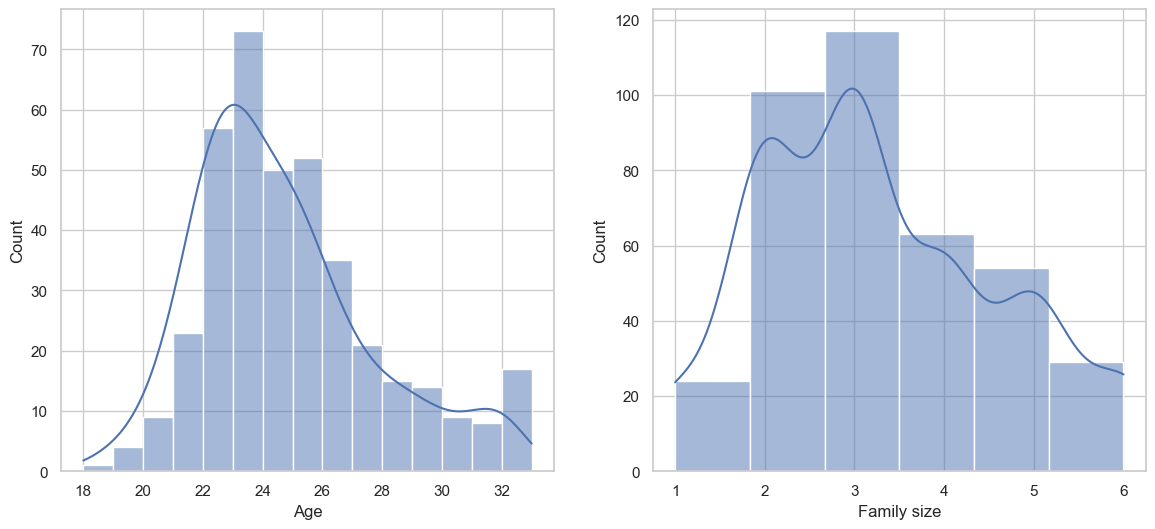

In [20]:
import seaborn as sns

fig,ax = plt.subplots(1, 2, figsize=(14, 6))

sns.set_theme(style="whitegrid")
sns.histplot(df["Age"] , bins=15 , kde = True, ax=ax[0])
sns.histplot(df["Family size"] , bins=6,kde=True, ax=ax[1])

In [21]:
encoder = LabelEncoder()
Categorical_Variables = ["Gender" ,"Marital Status","Occupation","Educational Qualifications","Monthly Income","Output","Unnamed: 12"]

for variable in Categorical_Variables:
    df[variable] = encoder.fit_transform(df[variable])

X = df.drop(["Feedback","latitude","longitude","Pin code"],axis=1)
y = encoder.fit_transform(df["Feedback"])
X.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Unnamed: 12
0,20,0,2,3,4,2,4,1,1
1,24,0,2,3,2,0,3,1,1
2,22,1,2,3,2,2,3,1,1
3,22,0,2,3,4,0,6,1,1
4,22,1,2,3,2,2,4,1,1


In [22]:
y[2]

0

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=5, random_state=42)

In [25]:
y_pred = rf.predict(xtest)

In [26]:
values = []
for i in range(1, 20):
    prd = rf.predict(X.iloc[[i]])[0]  # X.iloc[[i]] kullanarak satırı DataFrame olarak seçtik
    values.append([prd, y[i]])



In [27]:
values

[[1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 0],
 [1, 1]]

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,y_pred)

0.8974358974358975

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest,y_pred)

array([[ 8,  3],
       [ 5, 62]], dtype=int64)

In [30]:
rf.score(xtest,ytest)

0.8974358974358975